In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

In [2]:
SparkSession = SparkSession.builder.appName("My first spark work").getOrCreate()

In [3]:
SparkSession

 **header = "true"** ile Spark, CSV'deki ilk satırı sütun başlıkları olarak kabul eder. **inferSchema = True** ile Spark, sütunların veri türlerini otomatik olarak belirler.

In [4]:
rawDF = SparkSession.read.csv("MOCK_DATA.csv", header="true", inferSchema=True)

In [5]:
rawDF.show()

+---+----------+------------+--------------------+-------+-------------+--------------------+
| id|first_name|   last_name|               email| gender|      country|                city|
+---+----------+------------+--------------------+-------+-------------+--------------------+
|  1|     Denys|Schiefersten|dschiefersten0@ch...| Female|       Brazil|     Paty do Alferes|
|  2| Kimberley|  Christophe|kchristophe1@icio.us| Female|    Indonesia|             Puutura|
|  3|      Burr|      Fursey|bfursey2@hostgato...|   Male|      Andorra|          la Massana|
|  4|      Otis|     Marriot| omarriot3@diigo.com|   Male|        China|               Wutun|
|  5|   Chester|    Trahearn| ctrahearn4@yale.edu|   Male|     Colombia|             Popayán|
|  6|   Humbert|      Dacres|  hdacres5@weibo.com|   Male|       Russia|          Zhukovskiy|
|  7| Nikoletta|   Hickisson|nhickisson6@weibo...| Female|        China|             Tianbao|
|  8|    Quincy|       Rough|qrough7@ezinearti...|Agender|  

In [8]:
rawDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- country: string (nullable = true)
 |-- city: string (nullable = true)



In [9]:
rawDF.show(truncate=False)

+---+----------+------------+---------------------------------+-------+-------------+---------------------+
|id |first_name|last_name   |email                            |gender |country      |city                 |
+---+----------+------------+---------------------------------+-------+-------------+---------------------+
|1  |Denys     |Schiefersten|dschiefersten0@chicagotribune.com|Female |Brazil       |Paty do Alferes      |
|2  |Kimberley |Christophe  |kchristophe1@icio.us             |Female |Indonesia    |Puutura              |
|3  |Burr      |Fursey      |bfursey2@hostgator.com           |Male   |Andorra      |la Massana           |
|4  |Otis      |Marriot     |omarriot3@diigo.com              |Male   |China        |Wutun                |
|5  |Chester   |Trahearn    |ctrahearn4@yale.edu              |Male   |Colombia     |Popayán              |
|6  |Humbert   |Dacres      |hdacres5@weibo.com               |Male   |Russia       |Zhukovskiy           |
|7  |Nikoletta |Hickisson   

In [9]:
type(rawDF.columns)

list

In [10]:
rawDF.columns

['id', 'first_name', 'last_name', 'email', 'gender', 'country', 'city']

In [11]:
rawDF.count()

1000

In [12]:
rawDF.head(2)

[Row(id=1, first_name='Denys', last_name='Schiefersten', email='dschiefersten0@chicagotribune.com', gender='Female', country='Brazil', city='Paty do Alferes'),
 Row(id=2, first_name='Kimberley', last_name='Christophe', email='kchristophe1@icio.us', gender='Female', country='Indonesia', city='Puutura')]

In [13]:
nameCountryDF = rawDF.select('first_name', 'country')

In [14]:
nameCountryDF.show()

+----------+-------------+
|first_name|      country|
+----------+-------------+
|     Denys|       Brazil|
| Kimberley|    Indonesia|
|      Burr|      Andorra|
|      Otis|        China|
|   Chester|     Colombia|
|   Humbert|       Russia|
| Nikoletta|        China|
|    Quincy|         Peru|
|     Marcy|        China|
|      Nate|     Portugal|
|   Juliann|       Brazil|
|   Zebedee|United States|
|      Guss|     Thailand|
|    Angele|    Venezuela|
|   Roxanna| South Africa|
|     Dulce|         Peru|
|   Cecilio|       France|
|      Abel|      Ukraine|
| Rochester|        China|
|     Rowan|   Costa Rica|
+----------+-------------+
only showing top 20 rows



In [64]:
rawDF.describe().show(truncate=False)

+-------+-----------------+----------+----------+------------------------+----------+-----------+-----------+
|summary|id               |first_name|last_name |email                   |gender    |country    |city       |
+-------+-----------------+----------+----------+------------------------+----------+-----------+-----------+
|count  |1000             |1000      |1000      |1000                    |1000      |1000       |1000       |
|mean   |500.5            |NULL      |NULL      |NULL                    |NULL      |NULL       |NULL       |
|stddev |288.8194360957494|NULL      |NULL      |NULL                    |NULL      |NULL       |NULL       |
|min    |1                |Aaron     |Abade     |aagent4h@plala.or.jp    |Agender   |Afghanistan|Abomsa     |
|max    |1000             |Zsa zsa   |de Bullion|zsteadmanmx@edublogs.org|Polygender|Zambia     |Ḩammām Damt|
+-------+-----------------+----------+----------+------------------------+----------+-----------+-----------+



In [6]:
neweIdDF = rawDF.withColumn('new_id', rawDF['id'] + 1000)

In [70]:
neweIdDF.show()

+---+----------+------------+--------------------+-------+-------------+--------------------+------+
| id|first_name|   last_name|               email| gender|      country|                city|new_id|
+---+----------+------------+--------------------+-------+-------------+--------------------+------+
|  1|     Denys|Schiefersten|dschiefersten0@ch...| Female|       Brazil|     Paty do Alferes|  1001|
|  2| Kimberley|  Christophe|kchristophe1@icio.us| Female|    Indonesia|             Puutura|  1002|
|  3|      Burr|      Fursey|bfursey2@hostgato...|   Male|      Andorra|          la Massana|  1003|
|  4|      Otis|     Marriot| omarriot3@diigo.com|   Male|        China|               Wutun|  1004|
|  5|   Chester|    Trahearn| ctrahearn4@yale.edu|   Male|     Colombia|             Popayán|  1005|
|  6|   Humbert|      Dacres|  hdacres5@weibo.com|   Male|       Russia|          Zhukovskiy|  1006|
|  7| Nikoletta|   Hickisson|nhickisson6@weibo...| Female|        China|             Tianba

In [73]:
countByCityDF = rawDF.groupby('country').count()

In [76]:
countByCityDF.filter("country='Russia'").show()

+-------+-----+
|country|count|
+-------+-----+
| Russia|   53|
+-------+-----+



In [82]:
rawDF.filter("id >  500").show()

+---+----------+--------------------+--------------------+----------+-----------+-----------------+
| id|first_name|           last_name|               email|    gender|    country|             city|
+---+----------+--------------------+--------------------+----------+-----------+-----------------+
|501|    Dalton|             Meineck| dmeineckdw@webs.com|      Male|Philippines|          Bagulin|
|502|   Branden|             Lebourn|blebourndx@apache...|      Male|      China|          Sunfang|
|503|     Tabor|              Robert|    trobertdy@un.org|      Male|   Thailand|         Mukdahan|
|504|Georgeanna|             Causbey|gcausbeydz@flickr...|    Female|    Ireland|    Bailieborough|
|505|    Dorine|            Bellison| dbellisone0@com.com|    Female|      China|         Lingyuan|
|506|    Rustin|            Halleday|rhalledaye1@scien...|Polygender|      Syria|   Al Ghizlānīyah|
|507|   Shaylah|         Hollingsbee|shollingsbeee2@co...|    Female|    Vietnam|      Xuân Trường|


In [86]:
rawDF.filter(rawDF['id'] > 500).show()

+---+----------+--------------------+--------------------+----------+-----------+-----------------+
| id|first_name|           last_name|               email|    gender|    country|             city|
+---+----------+--------------------+--------------------+----------+-----------+-----------------+
|501|    Dalton|             Meineck| dmeineckdw@webs.com|      Male|Philippines|          Bagulin|
|502|   Branden|             Lebourn|blebourndx@apache...|      Male|      China|          Sunfang|
|503|     Tabor|              Robert|    trobertdy@un.org|      Male|   Thailand|         Mukdahan|
|504|Georgeanna|             Causbey|gcausbeydz@flickr...|    Female|    Ireland|    Bailieborough|
|505|    Dorine|            Bellison| dbellisone0@com.com|    Female|      China|         Lingyuan|
|506|    Rustin|            Halleday|rhalledaye1@scien...|Polygender|      Syria|   Al Ghizlānīyah|
|507|   Shaylah|         Hollingsbee|shollingsbeee2@co...|    Female|    Vietnam|      Xuân Trường|


In [89]:
gender_count = rawDF.groupBy("gender").count()

In [90]:
gender_count.show()

+-----------+-----+
|     gender|count|
+-----------+-----+
|Genderqueer|   23|
|    Agender|   22|
|     Female|  442|
| Polygender|   16|
|   Bigender|   19|
| Non-binary|   25|
|       Male|  441|
|Genderfluid|   12|
+-----------+-----+



In [92]:
country_gender_distribution = rawDF.groupBy("country", "gender").count().orderBy("country", "count", ascending=False)
country_gender_distribution.show()

+--------------+-----------+-----+
|       country|     gender|count|
+--------------+-----------+-----+
|        Zambia|Genderfluid|    1|
|         Yemen|     Female|    4|
|         Yemen|       Male|    2|
|       Vietnam|     Female|    6|
|       Vietnam|       Male|    5|
|       Vietnam|    Agender|    1|
|     Venezuela|     Female|    7|
|     Venezuela| Non-binary|    1|
|    Uzbekistan|       Male|    2|
| United States|       Male|   10|
| United States|     Female|    8|
| United States|Genderfluid|    1|
|United Kingdom|     Female|    1|
|United Kingdom|       Male|    1|
|       Ukraine|       Male|    7|
|       Ukraine|     Female|    6|
|       Ukraine| Polygender|    1|
|       Ukraine| Non-binary|    1|
|        Uganda|     Female|    2|
|        Uganda|    Agender|    1|
+--------------+-----------+-----+
only showing top 20 rows



In [10]:
from pyspark.sql.functions import col, count, when, sum, round

# Ülkelere göre cinsiyet dağılımı ve oranları
country_gender_analysis = rawDF.groupBy("country") \
    .agg(
        count("*").alias("total_count"),
        count(when(col("gender") == "Male", True)).alias("male_count"),
        count(when(col("gender") == "Female", True)).alias("female_count"),
        round(count(when(col("gender") == "Male", True)) / count("*") * 100, 2).alias("male_percentage"),
        round(count(when(col("gender") == "Female", True)) / count("*") * 100, 2).alias("female_percentage")
    ) \
    .orderBy(col("total_count").desc())

country_gender_analysis.show()

+--------------+-----------+----------+------------+---------------+-----------------+
|       country|total_count|male_count|female_count|male_percentage|female_percentage|
+--------------+-----------+----------+------------+---------------+-----------------+
|         China|        199|        83|          88|          41.71|            44.22|
|     Indonesia|         99|        42|          49|          42.42|            49.49|
|   Philippines|         59|        25|          27|          42.37|            45.76|
|        Russia|         53|        30|          19|           56.6|            35.85|
|        Brazil|         37|        21|          14|          56.76|            37.84|
|        Poland|         36|        14|          16|          38.89|            44.44|
|      Portugal|         36|        18|          17|           50.0|            47.22|
|        France|         27|        14|          11|          51.85|            40.74|
|          Peru|         22|         8|    

In [11]:
rawDF.drop('email').show(truncate=False)

+---+----------+------------+-------+-------------+---------------------+
|id |first_name|last_name   |gender |country      |city                 |
+---+----------+------------+-------+-------------+---------------------+
|1  |Denys     |Schiefersten|Female |Brazil       |Paty do Alferes      |
|2  |Kimberley |Christophe  |Female |Indonesia    |Puutura              |
|3  |Burr      |Fursey      |Male   |Andorra      |la Massana           |
|4  |Otis      |Marriot     |Male   |China        |Wutun                |
|5  |Chester   |Trahearn    |Male   |Colombia     |Popayán              |
|6  |Humbert   |Dacres      |Male   |Russia       |Zhukovskiy           |
|7  |Nikoletta |Hickisson   |Female |China        |Tianbao              |
|8  |Quincy    |Rough       |Agender|Peru         |Carumas              |
|9  |Marcy     |Debill      |Female |China        |Boshi                |
|10 |Nate      |Scotson     |Male   |Portugal     |Mafra                |
|11 |Juliann   |Rewbottom   |Female |B

In [12]:
renamedDF = rawDF.withColumnRenamed("first_name", "name")
renamedDF.show()

+---+---------+------------+--------------------+-------+-------------+--------------------+
| id|     name|   last_name|               email| gender|      country|                city|
+---+---------+------------+--------------------+-------+-------------+--------------------+
|  1|    Denys|Schiefersten|dschiefersten0@ch...| Female|       Brazil|     Paty do Alferes|
|  2|Kimberley|  Christophe|kchristophe1@icio.us| Female|    Indonesia|             Puutura|
|  3|     Burr|      Fursey|bfursey2@hostgato...|   Male|      Andorra|          la Massana|
|  4|     Otis|     Marriot| omarriot3@diigo.com|   Male|        China|               Wutun|
|  5|  Chester|    Trahearn| ctrahearn4@yale.edu|   Male|     Colombia|             Popayán|
|  6|  Humbert|      Dacres|  hdacres5@weibo.com|   Male|       Russia|          Zhukovskiy|
|  7|Nikoletta|   Hickisson|nhickisson6@weibo...| Female|        China|             Tianbao|
|  8|   Quincy|       Rough|qrough7@ezinearti...|Agender|         Peru

In [13]:
display(rawDF)

DataFrame[id: int, first_name: string, last_name: string, email: string, gender: string, country: string, city: string]

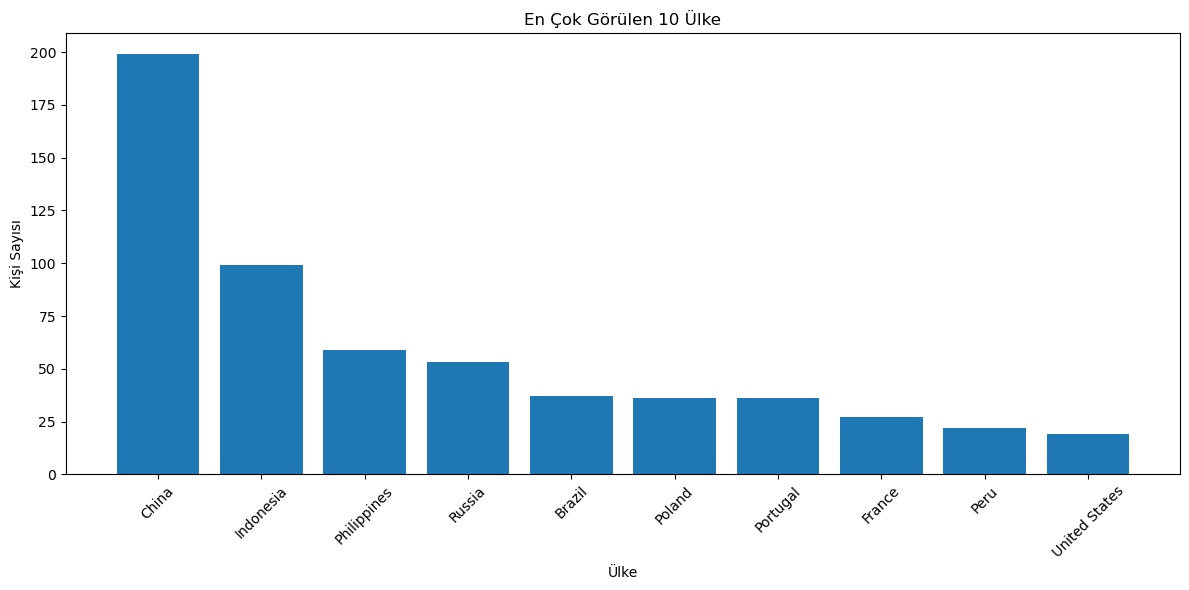

In [7]:
import matplotlib.pyplot as plt

# En çok görülen 10 ülkeyi seçelim
top_countries = rawDF.groupBy("country").count().orderBy("count", ascending=False).limit(10)

# PySpark DataFrame'ini Pandas DataFrame'ine çevirelim
top_countries_pd = top_countries.toPandas()

# Görselleştirme
plt.figure(figsize=(12,6))
plt.bar(top_countries_pd['country'], top_countries_pd['count'])
plt.title('En Çok Görülen 10 Ülke')
plt.xlabel('Ülke')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
rawDF.show(truncate=False)

+---+----------+------------+---------------------------------+-------+-------------+---------------------+
|id |first_name|last_name   |email                            |gender |country      |city                 |
+---+----------+------------+---------------------------------+-------+-------------+---------------------+
|1  |Denys     |Schiefersten|dschiefersten0@chicagotribune.com|Female |Brazil       |Paty do Alferes      |
|2  |Kimberley |Christophe  |kchristophe1@icio.us             |Female |Indonesia    |Puutura              |
|3  |Burr      |Fursey      |bfursey2@hostgator.com           |Male   |Andorra      |la Massana           |
|4  |Otis      |Marriot     |omarriot3@diigo.com              |Male   |China        |Wutun                |
|5  |Chester   |Trahearn    |ctrahearn4@yale.edu              |Male   |Colombia     |Popayán              |
|6  |Humbert   |Dacres      |hdacres5@weibo.com               |Male   |Russia       |Zhukovskiy           |
|7  |Nikoletta |Hickisson   

In [42]:
from pyspark.sql.functions import countDistinct

# Ülkelere göre toplam şehir sayısını hesapla
city_count_by_country = rawDF.groupBy("country") \
    .agg(countDistinct("city").alias("total_cities")) \
    .orderBy("total_cities", ascending=False)

# Sonuçları göster
city_count_by_country.show(truncate=False) 

+--------------+------------+
|country       |total_cities|
+--------------+------------+
|China         |195         |
|Indonesia     |98          |
|Philippines   |58          |
|Russia        |52          |
|Brazil        |37          |
|Poland        |36          |
|Portugal      |35          |
|France        |26          |
|Peru          |22          |
|Sweden        |18          |
|United States |18          |
|Thailand      |17          |
|Ukraine       |15          |
|Greece        |15          |
|Czech Republic|13          |
|Argentina     |12          |
|Vietnam       |12          |
|Colombia      |11          |
|Canada        |11          |
|Japan         |11          |
+--------------+------------+
only showing top 20 rows



In [10]:
rawDF.createOrReplaceTempView("mock_data_table")

In [16]:
sql = SparkSession.sql

In [17]:
sql("SELECT * FROM mock_data_table WHERE id > 500").show()

+---+----------+--------------------+--------------------+----------+-----------+-----------------+
| id|first_name|           last_name|               email|    gender|    country|             city|
+---+----------+--------------------+--------------------+----------+-----------+-----------------+
|501|    Dalton|             Meineck| dmeineckdw@webs.com|      Male|Philippines|          Bagulin|
|502|   Branden|             Lebourn|blebourndx@apache...|      Male|      China|          Sunfang|
|503|     Tabor|              Robert|    trobertdy@un.org|      Male|   Thailand|         Mukdahan|
|504|Georgeanna|             Causbey|gcausbeydz@flickr...|    Female|    Ireland|    Bailieborough|
|505|    Dorine|            Bellison| dbellisone0@com.com|    Female|      China|         Lingyuan|
|506|    Rustin|            Halleday|rhalledaye1@scien...|Polygender|      Syria|   Al Ghizlānīyah|
|507|   Shaylah|         Hollingsbee|shollingsbeee2@co...|    Female|    Vietnam|      Xuân Trường|


In [18]:
sql("SELECT gender, COUNT(*) as count FROM mock_data_table GROUP BY gender").show()

+-----------+-----+
|     gender|count|
+-----------+-----+
|Genderqueer|   23|
|    Agender|   22|
|     Female|  442|
| Polygender|   16|
|   Bigender|   19|
| Non-binary|   25|
|       Male|  441|
|Genderfluid|   12|
+-----------+-----+



In [31]:
sql("select email, country from mock_data_table").show(truncate=False)

+---------------------------------+-------------+
|email                            |country      |
+---------------------------------+-------------+
|dschiefersten0@chicagotribune.com|Brazil       |
|kchristophe1@icio.us             |Indonesia    |
|bfursey2@hostgator.com           |Andorra      |
|omarriot3@diigo.com              |China        |
|ctrahearn4@yale.edu              |Colombia     |
|hdacres5@weibo.com               |Russia       |
|nhickisson6@weibo.com            |China        |
|qrough7@ezinearticles.com        |Peru         |
|mdebill8@skyrock.com             |China        |
|nscotson9@mashable.com           |Portugal     |
|jrewbottoma@ameblo.jp            |Brazil       |
|zdowngateb@blogger.com           |United States|
|gvonbrookc@sfgate.com            |Thailand     |
|aildend@nationalgeographic.com   |Venezuela    |
|rwinkse@reuters.com              |South Africa |
|dbritof@boston.com               |Peru         |
|cbrabbang@last.fm                |France       |


In [27]:
country_gender_analysis.show(truncate=False)

+--------------+-----------+----------+------------+---------------+-----------------+
|country       |total_count|male_count|female_count|male_percentage|female_percentage|
+--------------+-----------+----------+------------+---------------+-----------------+
|China         |199        |83        |88          |41.71          |44.22            |
|Indonesia     |99         |42        |49          |42.42          |49.49            |
|Philippines   |59         |25        |27          |42.37          |45.76            |
|Russia        |53         |30        |19          |56.6           |35.85            |
|Brazil        |37         |21        |14          |56.76          |37.84            |
|Poland        |36         |14        |16          |38.89          |44.44            |
|Portugal      |36         |18        |17          |50.0           |47.22            |
|France        |27         |14        |11          |51.85          |40.74            |
|Peru          |22         |8         |10  

In [38]:
# country si Turkey olanları getir

sql("SELECT * FROM mock_data_table WHERE country = 'China'").show(truncate=False)

+---+----------+----------+-----------------------------+-----------+-------+-----------+
|id |first_name|last_name |email                        |gender     |country|city       |
+---+----------+----------+-----------------------------+-----------+-------+-----------+
|4  |Otis      |Marriot   |omarriot3@diigo.com          |Male       |China  |Wutun      |
|7  |Nikoletta |Hickisson |nhickisson6@weibo.com        |Female     |China  |Tianbao    |
|9  |Marcy     |Debill    |mdebill8@skyrock.com         |Female     |China  |Boshi      |
|19 |Rochester |Jost      |rjosti@miibeian.gov.cn       |Male       |China  |Hexi       |
|24 |Haroun    |Shovelton |hshoveltonn@indiatimes.com   |Male       |China  |Shuikou    |
|27 |Samaria   |Axcell    |saxcellq@ifeng.com           |Female     |China  |Paizhou    |
|30 |Nichole   |Saby      |nsabyt@is.gd                 |Female     |China  |Siqiao     |
|36 |Eamon     |Overy     |eoveryz@bigcartel.com        |Male       |China  |Sujitan    |
|43 |Aldo 

In [42]:
personrawDF = SparkSession.read.csv("person.csv", header=True, inferSchema=True)

In [44]:
personrawDF.describe().show(truncate=False)

+-------+-----+-------+-----------------+-------+
|summary|isim |soyisim|yas              |sehir  |
+-------+-----+-------+-----------------+-------+
|count  |8    |8      |8                |8      |
|mean   |NULL |NULL   |28.8             |NULL   |
|stddev |NULL |NULL   |5.890670590009257|NULL   |
|min    |Burak|Bulut  |22               |Aksaray|
|max    |Ömer |önüm   |null             |İzmir  |
+-------+-----+-------+-----------------+-------+



In [45]:
SparkSession = SparkSession.builder.appName("My second spark work").getOrCreate()

In [47]:
personrawDF = SparkSession.read.csv("person.csv", header=True, inferSchema=True)

DataFrame[isim: string, soyisim: string, yas: string, sehir: string]

In [48]:
personrawDF.show()

+---------+--------+----+--------+
|     isim| soyisim| yas|   sehir|
+---------+--------+----+--------+
|   Mehmet|   Fırat|  25|  Ankara|
|     Mert|Mertoğlu|  28|İstanbuş|
| Bünyamin|    önüm|null|   İzmir|
|   Selçuk|    null|null|   Konya|
|     null|    null|  37| Kocaeli|
|     Ömer| çorapçı|null|    null|
|    Burak| Korkmaz|  32|    null|
|hasan Can|   Bulut|  22| Aksaray|
+---------+--------+----+--------+



In [55]:
personrawDF.na.drop().show()

+---------+--------+----+--------+
|     isim| soyisim| yas|   sehir|
+---------+--------+----+--------+
|   Mehmet|   Fırat|  25|  Ankara|
|     Mert|Mertoğlu|  28|İstanbuş|
| Bünyamin|    önüm|null|   İzmir|
|   Selçuk|    null|null|   Konya|
|     null|    null|  37| Kocaeli|
|     Ömer| çorapçı|null|    null|
|    Burak| Korkmaz|  32|    null|
|hasan Can|   Bulut|  22| Aksaray|
+---------+--------+----+--------+

